In [1]:
import os
import csv
import pickle
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from collections import defaultdict

from utils import savefig

plt.rcParams['font.size'] = 14

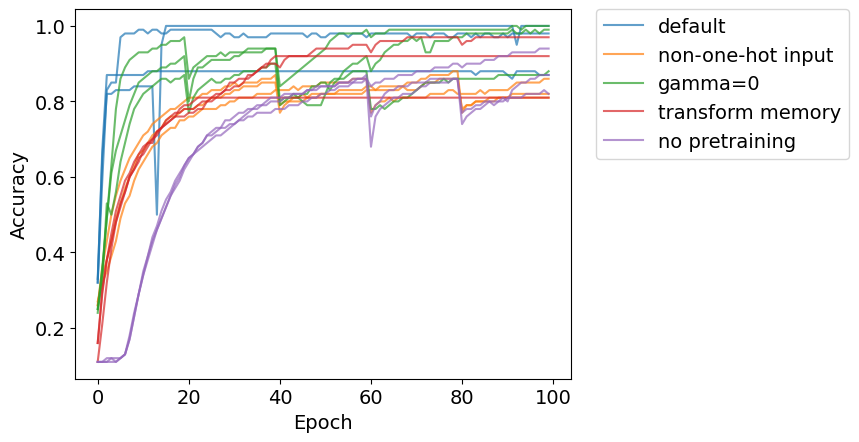

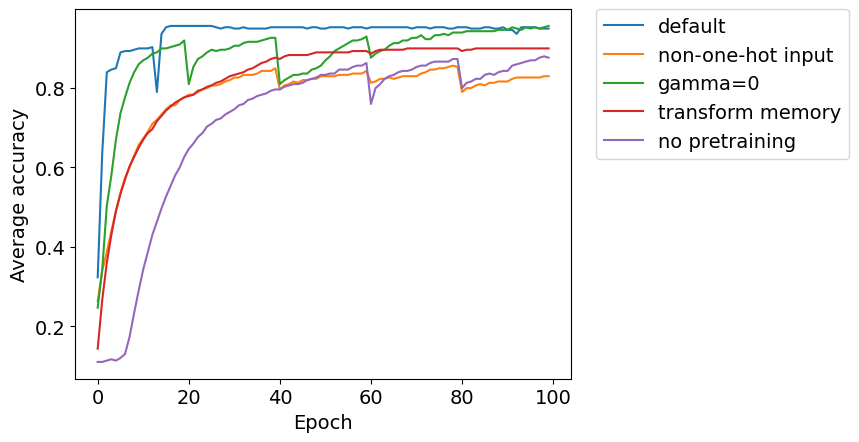

In [24]:
training_curve_folder = Path("./experiments/VaryParam/saved_models/ValueMemoryGRU")
setup_names = os.listdir(training_curve_folder)
training_curves = defaultdict(list)

for setup_name in setup_names:
    exp_name = setup_name.split("-")[0]
    exp_num = int(setup_name.split("-")[1])
    file_name = "accuracy_2.npy"
    if "nopretrain" in setup_name:
        file_name = "accuracy_1.npy"
    if os.path.exists(training_curve_folder / setup_name / file_name):
        training_data = np.load(training_curve_folder / setup_name / file_name)
        zero_indices = np.where(training_data == 0)[0]
        if len(zero_indices) > 0:
            last_zero_index = zero_indices[0]
            training_data[last_zero_index:] = training_data[last_zero_index-1]
        data = np.zeros(100)
        if len(training_data) < 100:
            data[:len(training_data)] = training_data
            data[len(training_data):] = training_data[-1]
        else:
            data = training_data[:100]
        training_curves[exp_name].append(data)

plot_names = ['setup', 'setup_featureinput', 'setup_gamma0', 'setup_memtransform', 'setup_nopretrain']
labels = ['default', 'non-one-hot input', 'gamma=0', 'transform memory', 'no pretraining']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
for i, exp_name in enumerate(plot_names):
    if exp_name in training_curves:
        for j in range(len(training_curves[exp_name])):
            if j == 0:
                plt.plot(training_curves[exp_name][j], label=labels[i], color=colors[i], alpha=0.7)
            else:
                plt.plot(training_curves[exp_name][j], color=colors[i], alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

for i, exp_name in enumerate(plot_names):
    if exp_name in training_curves:
        plt.plot(np.mean(training_curves[exp_name], axis=0), label=labels[i], color=colors[i])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("Epoch")
plt.ylabel("Average accuracy")
plt.show()

### semantic contiguity

In [17]:
semantic_folder = Path("./experiments/Semantic/figures/semantic/ValueMemoryGRU")

featurecode_folder = semantic_folder / "setup_featurecode"
featurecode_folders = os.listdir(featurecode_folder)

featurecode_data = []
featurecode_gt = []

for folder in featurecode_folders:
    data = np.load(featurecode_folder / folder / "data" / "semantic_contiguity_results.npy")
    gt = np.load(featurecode_folder / folder / "data" / "semantic_contiguity_results_gt.npy")
    featurecode_data.append(data)
    featurecode_gt.append(gt)

featurecode_data = np.array(featurecode_data)
featurecode_gt = np.array(featurecode_gt)


onehotcode_folder = semantic_folder / "setup_onehot"
onehotcode_folders = os.listdir(onehotcode_folder)

onehotcode_data = []
onehotcode_gt = []

for folder in onehotcode_folders:
    data = np.load(onehotcode_folder / folder / "data" / "semantic_contiguity_results.npy")
    gt = np.load(onehotcode_folder / folder / "data" / "semantic_contiguity_results_gt.npy")
    onehotcode_data.append(data)
    onehotcode_gt.append(gt)

onehotcode_data = np.array(onehotcode_data)
onehotcode_gt = np.array(onehotcode_gt)



featurecode_data = np.sum(featurecode_data, axis=0)
onehotcode_data = np.sum(onehotcode_data, axis=0)

featurecode_gt = np.sum(featurecode_gt, axis=0)
onehotcode_gt = np.sum(onehotcode_gt, axis=0)

print(featurecode_data)
print(featurecode_gt)
print(onehotcode_data)
print(onehotcode_gt)

featurecode_ratio = featurecode_data / featurecode_gt
onehotcode_ratio = onehotcode_data / onehotcode_gt


[3.93322775 6.19526762 4.65481722 1.83872001 0.35521355 0.02275384
 0.        ]
[4.16225938 6.84155267 4.44154179 1.38240994 0.17223622 0.
 0.        ]
[4.87640076 6.8272598  4.94971651 1.83026644 0.47243448 0.04392202
 0.        ]
[4.62275346 7.68895631 4.96245318 1.53729884 0.18853821 0.
 0.        ]


/tmp/ipykernel_1074494/3305235615.py:47: RuntimeWarning: divide by zero encountered in divide
  featurecode_ratio = featurecode_data / featurecode_gt
/tmp/ipykernel_1074494/3305235615.py:47: RuntimeWarning: invalid value encountered in divide
  featurecode_ratio = featurecode_data / featurecode_gt
/tmp/ipykernel_1074494/3305235615.py:48: RuntimeWarning: divide by zero encountered in divide
  onehotcode_ratio = onehotcode_data / onehotcode_gt
/tmp/ipykernel_1074494/3305235615.py:48: RuntimeWarning: invalid value encountered in divide
  onehotcode_ratio = onehotcode_data / onehotcode_gt


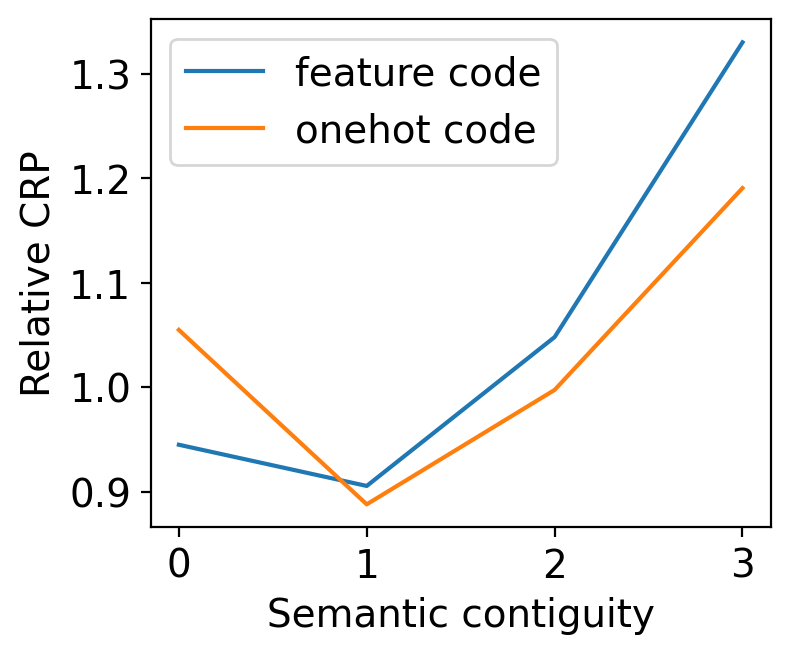

In [21]:

plt.figure(figsize=(4, 3.3), dpi=200)
plt.plot(np.arange(0, 4), featurecode_ratio[:4], label="feature code")
plt.plot(np.arange(0, 4), onehotcode_ratio[:4], label="onehot code")
plt.xlabel("Semantic contiguity")
plt.ylabel("Relative CRP")
plt.legend()
plt.show()





### key-value memory model

In [6]:
data_folder = Path("./experiments/Transform/figures/ValueMemoryGRU/setup_kv_sametransform")

keys_index_variance, keys_identity_variance, values_index_variance, values_identity_variance = [], [], [], []

for i in range(20):
    try:
        data = np.load(data_folder / str(i) / "explained_variance.npy")
        keys_index_variance.append(data[0])
        keys_identity_variance.append(data[1])
        values_index_variance.append(data[2])
        values_identity_variance.append(data[3])
    except:
        pass

keys_index_variance = np.array(keys_index_variance)
keys_identity_variance = np.array(keys_identity_variance)
values_index_variance = np.array(values_index_variance)
values_identity_variance = np.array(values_identity_variance)

print(keys_index_variance)
print(keys_identity_variance)
print(values_index_variance)
print(values_identity_variance)


[0.89732859 0.85843243 0.90567231 0.91933891 0.91283159 0.82023462
 0.94185696 0.91488593 0.82137319 0.94033333 0.89115258 0.91783367
 0.92721805 0.90617947 0.88607521 0.89455369]
[0.02832457 0.04608721 0.02142544 0.02232681 0.02321638 0.0327451
 0.0199569  0.02848358 0.02380868 0.01985865 0.01843906 0.02626534
 0.02428169 0.01819332 0.02920381 0.02752023]
[0.30991793 0.2355122  0.47785048 0.38303009 0.42124982 0.40046109
 0.26737998 0.45248791 0.30362104 0.34222716 0.46068072 0.41795897
 0.5432581  0.28000717 0.38586582 0.47812542]
[0.13538704 0.11162977 0.23124204 0.22403927 0.18125466 0.11426589
 0.07069357 0.14609514 0.08724176 0.14047312 0.12600642 0.21636852
 0.08639407 0.07757117 0.15631825 0.24168741]


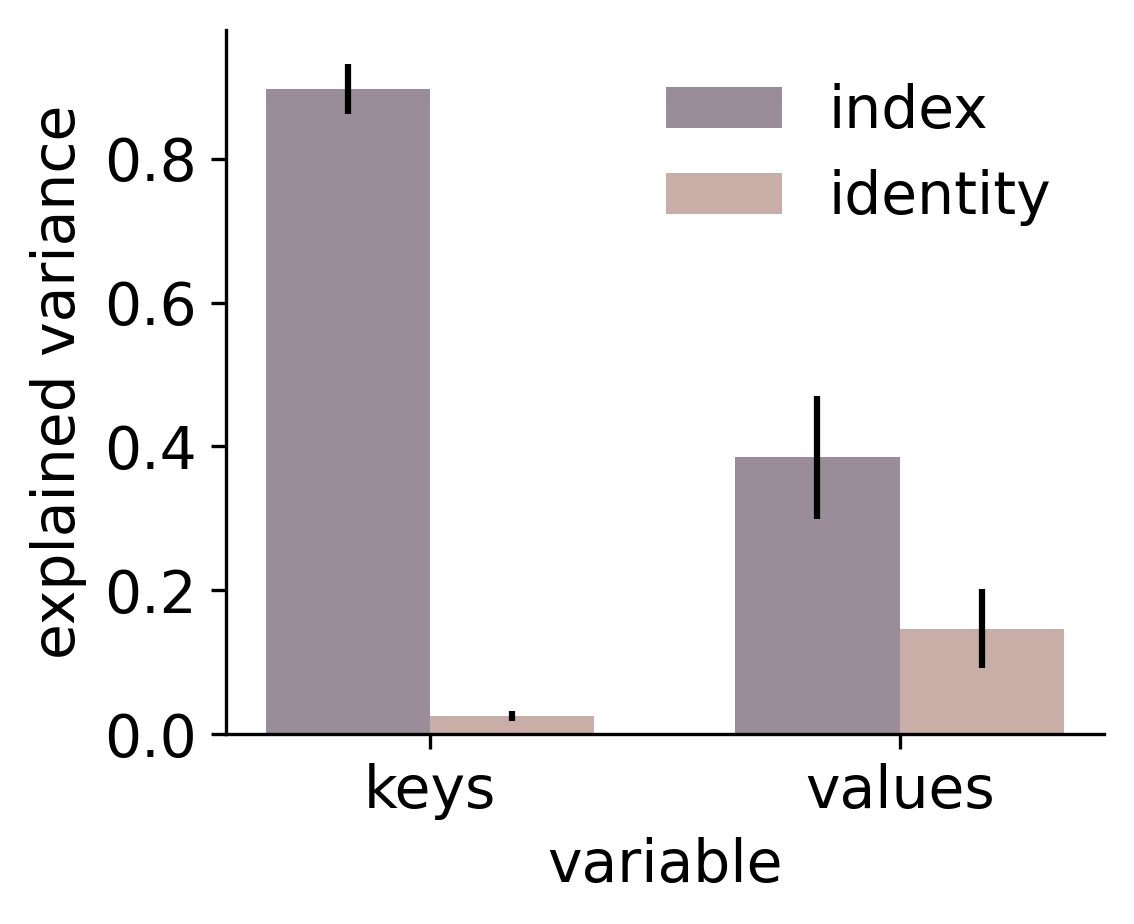

In [10]:
plt.figure(figsize=(4, 3.3), dpi=300)
bar_width = 0.35
index = np.arange(2)
plt.bar(index, [np.mean(keys_index_variance), np.mean(values_index_variance)], bar_width, label="index", color=["#9A8C98"],
    yerr=[np.std(keys_index_variance), np.std(values_index_variance)])
plt.bar(index + bar_width, [np.mean(keys_identity_variance), np.mean(values_identity_variance)], bar_width, label="identity", color=["#C9ADA7"],
    yerr=[np.std(keys_identity_variance), np.std(values_identity_variance)])
plt.xlabel("variable")
plt.ylabel("explained variance")
plt.xticks(index + bar_width / 2, ["keys", "values"])
plt.legend(frameon=False)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()
